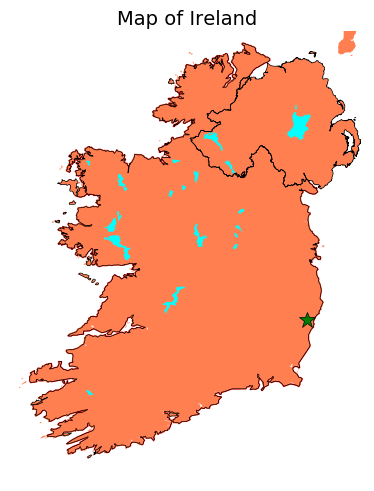

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon


fig = plt.figure(figsize = (5,5))
# rect [left, bottom, width, height]  
ax = fig.add_axes([0.1,0.1,0.9,0.9], frameon=False)
ax.set_axis_bgcolor('white')


MyMap = Basemap(projection='tmerc', lat_0 =  53.866772, lon_0 = -5.23636,satellite_height=300,
        llcrnrlon=-10.65073, llcrnrlat=51.16209,urcrnrlon=  -5.372477, urcrnrlat=55.507785, resolution="f")


# load the shapefile, use the name 'states'
MyMap.readshapefile('ireland/Ireland', name='borders', drawbounds=True)

# associate this axes with the Basemap instance.
#MyMap.ax = ax

# ### Define the bounding polygon
polys = []
for nshape,seg in enumerate(MyMap.borders):
    if nshape == 17 : #This nshape denotes the large continental body of the northern Ireland
        mainseg1 = seg
        mainpoly1 = Polygon(mainseg1,facecolor='none',edgecolor='r')
        
###### We cannot set 2 clip paths. We need to do a cascade union of these polygons to get a polygon
###### over entire ireland like we have for USA. Then we can clip the point lying outside this region.
ax.set_clip_path(mainpoly1)

## Define a test point
testLat = 52.79531
testLong = -6.25078
testX,testY = MyMap(testLong,testLat)
MyMap.plot(testX,testY,'g*',markersize=12)


# # plt.savefig("../Figures/OzoneGT_test.png", bbox_inches='tight', pad_inches=.2, format="png", dpi=1000)
ax.add_patch(mainpoly1)
MyMap.fillcontinents(color='coral',lake_color='aqua')

#ax.add_patch(mainpoly2)
plt.title("Map of Ireland")